In [36]:
import torch
from ultralytics import YOLO

In [70]:
model_type = 'l'
model = YOLO(f'../models/fire_{model_type}.pt')


image 1/1 /Users/igor/Desktop/Petnica/PSI_Fire_Detection/notebooks/../data/D-Fire/train/images/AoF01917.jpg: 384x640 (no detections), 205.8ms
Speed: 0.8ms preprocess, 205.8ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /Users/igor/Desktop/Petnica/PSI_Fire_Detection/notebooks/../data/D-Fire/train/images/WEB04346.jpg: 448x640 1 fire, 208.0ms
Speed: 0.8ms preprocess, 208.0ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /Users/igor/Desktop/Petnica/PSI_Fire_Detection/notebooks/../data/D-Fire/train/images/WEB03429.jpg: 352x640 (no detections), 156.7ms
Speed: 0.8ms preprocess, 156.7ms inference, 0.4ms postprocess per image at shape (1, 3, 352, 640)

image 1/1 /Users/igor/Desktop/Petnica/PSI_Fire_Detection/notebooks/../data/D-Fire/train/images/WEB02737.jpg: 512x640 (no detections), 242.2ms
Speed: 1.0ms preprocess, 242.2ms inference, 0.2ms postprocess per image at shape (1, 3, 512, 640)

image 1/1 /Users/igor/Desktop/Petnica/PSI_Fi

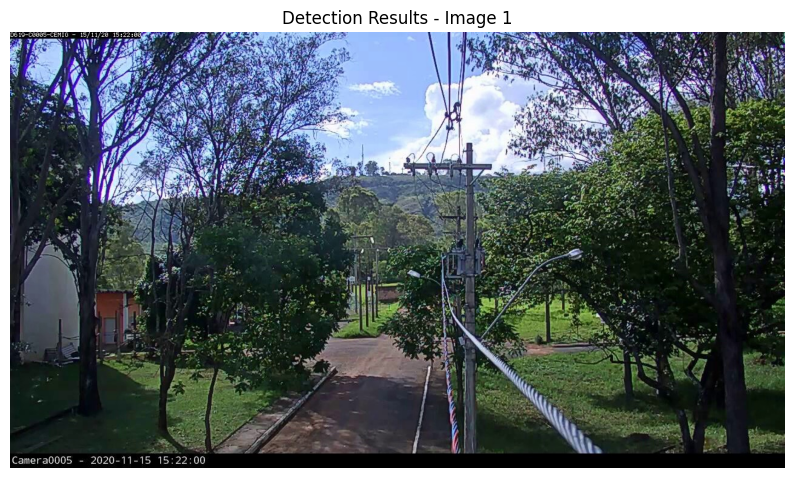

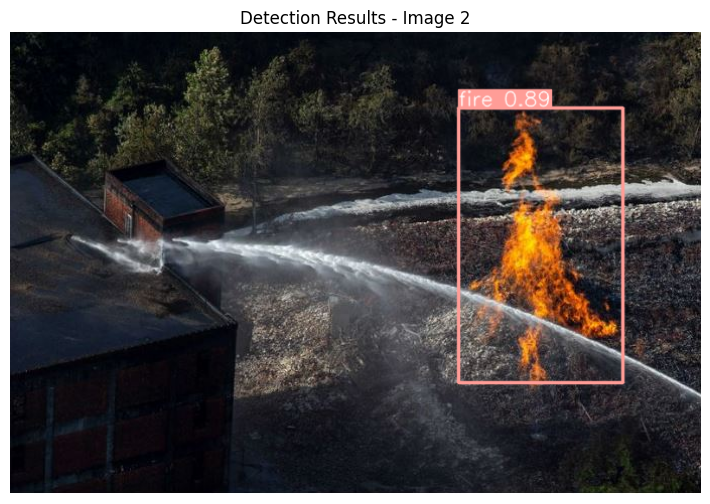

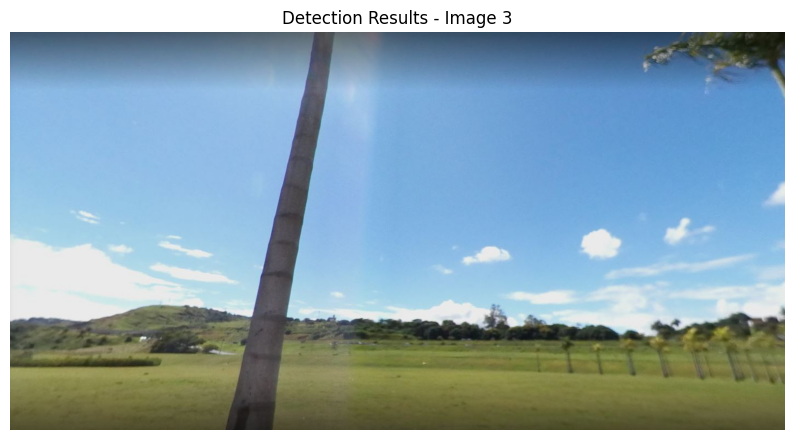

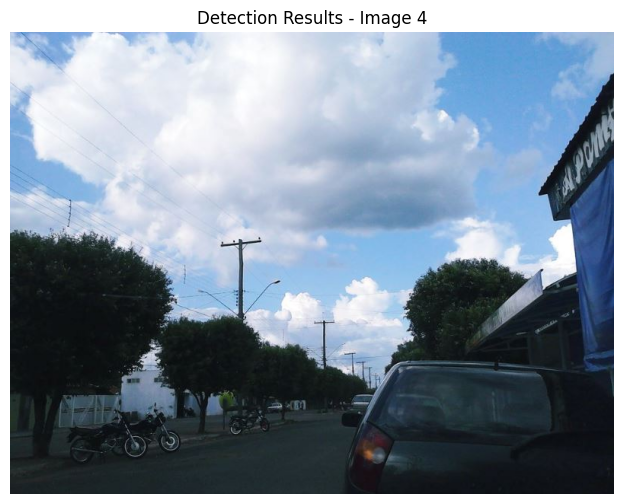

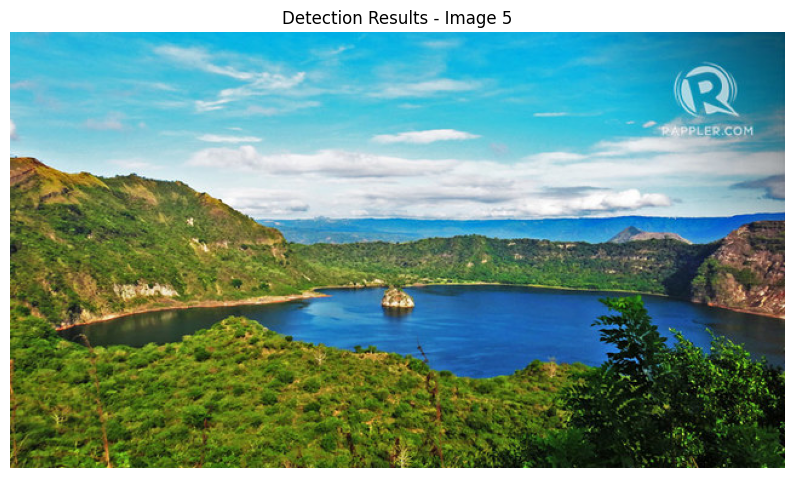

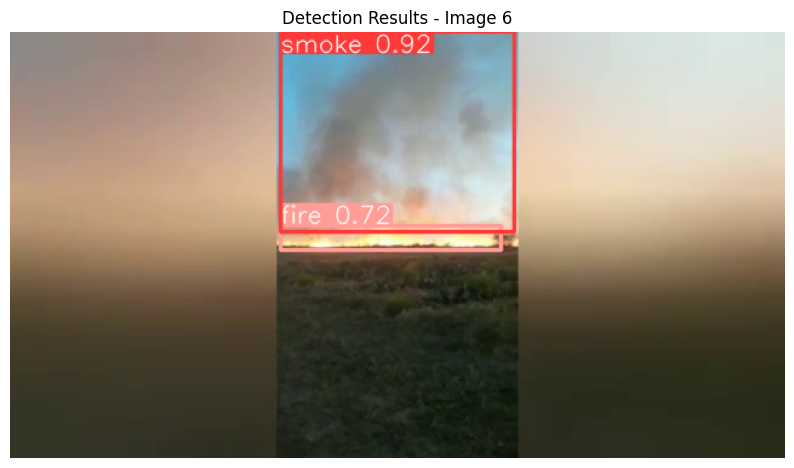

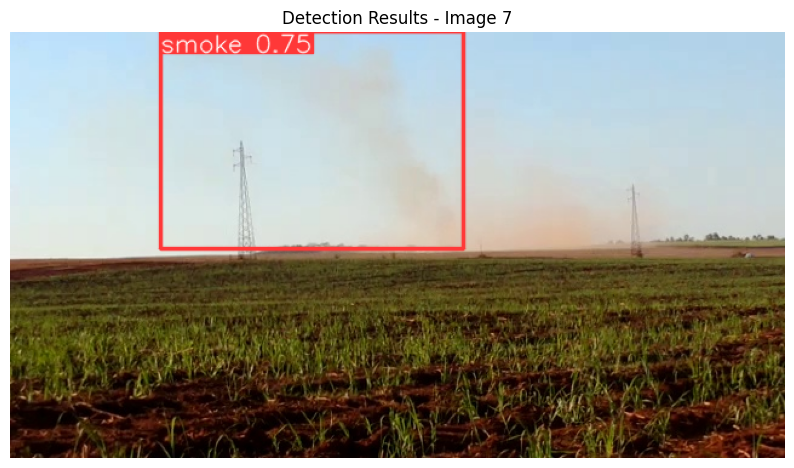

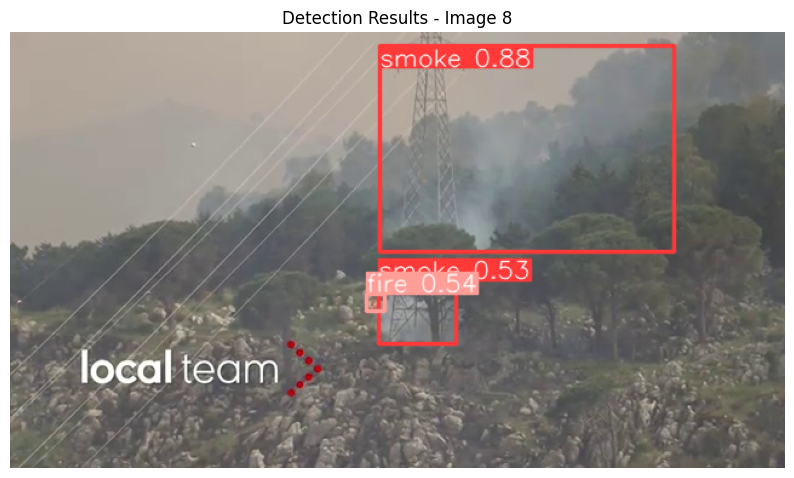

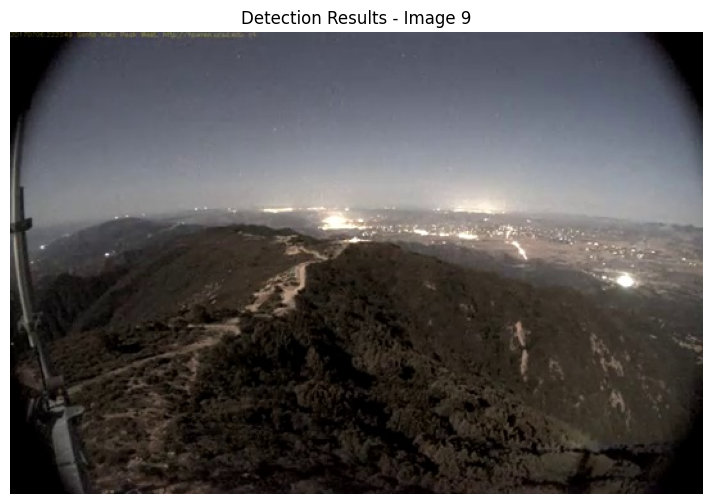

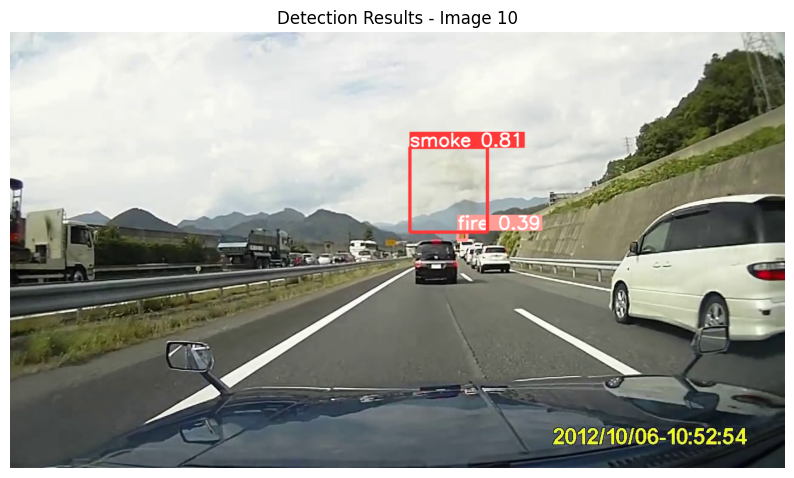

In [38]:
import os
from glob import glob
from PIL import Image

# Get a list of image file paths
image_folder = '../data/D-Fire/train/images'
image_paths = glob(os.path.join(image_folder, '*.jpg'))[:10]  # Load first 5 images

import cv2

# Run YOLOv8 inference on each image
results = []
for img_path in image_paths:
    results.append(model(img_path))  # This runs detection and stores results

import matplotlib.pyplot as plt
for i, result in enumerate(results):
    # result.plot() returns a numpy array (RGB image with bounding boxes)
    im_array = cv2.cvtColor(result[0].plot(), cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 6))
    plt.imshow(im_array)
    plt.axis('off')
    plt.title(f"Detection Results - Image {i+1}")
    plt.show()

In [39]:
import os
from glob import glob
import cv2
import numpy as np
import torch


# Prepare image paths
image_folder = '../data/D-Fire/test/images'
image_paths = glob(os.path.join(image_folder, '*.jpg'))

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set up a hook to capture activations from a chosen layer
embeddings = []

# Choose the layer you want to extract embeddings from (example: backbone layer -2)
# Use print(model.model) to inspect layers and change this as needed
target_layer = model.model.model[-2]  # E.g., last backbone conv or before head

def hook_fn(module, input, output):
    # Output is a torch.Tensor of shape [1, C, H, W] or [1, C]
    # Flatten if needed
    if output.ndim > 2:
        output = torch.nn.functional.adaptive_avg_pool2d(output, 1).squeeze()
    else:
        output = output.squeeze()
    embeddings.append(output.detach().cpu().numpy())

# Register hook
hook_handle = target_layer.register_forward_hook(hook_fn)

# Process images
for img_path in image_paths:
    image_bgr = cv2.imread(img_path)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    # Preprocess (YOLO does this internally, but we need to get tensor for hook to work)
    results = model(image_rgb)

# Remove hook after use
hook_handle.remove()

# Convert to array and save
embeddings_array = np.stack(embeddings)
np.save(f'../data/embeddings/yolo_{model_type}_d_fire_embeddings.npy', embeddings_array)
print(f"Saved {len(embeddings)} embeddings to embeddings.npy")


0: 384x640 1 smoke, 205.4ms
Speed: 0.7ms preprocess, 205.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 352x640 (no detections), 177.1ms
Speed: 1.0ms preprocess, 177.1ms inference, 0.2ms postprocess per image at shape (1, 3, 352, 640)

0: 384x640 (no detections), 188.4ms
Speed: 0.9ms preprocess, 188.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 448x640 (no detections), 210.7ms
Speed: 0.9ms preprocess, 210.7ms inference, 0.2ms postprocess per image at shape (1, 3, 448, 640)

0: 480x640 1 smoke, 238.2ms
Speed: 0.9ms preprocess, 238.2ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 384x640 1 fire, 189.8ms
Speed: 0.8ms preprocess, 189.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 194.7ms
Speed: 0.6ms preprocess, 194.7ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 smoke, 185.6ms
Speed: 1.0ms preprocess, 185.6ms inference, 0.3ms p

Saved 4306 embeddings to embeddings.npy


In [ ]:
# Prepare image paths
image_folder = '../data/Finland/Unimodal/rgb_modality'
image_paths = glob(os.path.join(image_folder, '*/*/*.jpg'))

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set up a hook to capture activations from a chosen layer
embeddings = []

# Choose the layer you want to extract embeddings from (example: backbone layer -2)
# Use print(model.model) to inspect layers and change this as needed
target_layer = model.model.model[-2]  # E.g., last backbone conv or before head

def hook_fn(module, input, output):
    # Output is a torch.Tensor of shape [1, C, H, W] or [1, C]
    # Flatten if needed
    if output.ndim > 2:
        output = torch.nn.functional.adaptive_avg_pool2d(output, 1).squeeze()
    else:
        output = output.squeeze()
    embeddings.append(output.detach().cpu().numpy())

# Register hook
hook_handle = target_layer.register_forward_hook(hook_fn)

# Process images
for img_path in image_paths:
    
    image_bgr = cv2.imread(img_path)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    # Preprocess (YOLO does this internally, but we need to get tensor for hook to work)
    results = model(image_rgb)

# Remove hook after use
hook_handle.remove() 

# Convert to array and save
embeddings_array = np.stack(embeddings)
np.save(f'../data/embeddings/yolo_{model_type}_finland_embeddings.npy', embeddings_array)
print(f"Saved {len(embeddings)} embeddings to embeddings.npy")


0: 384x640 (no detections), 205.3ms
Speed: 1.7ms preprocess, 205.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 512x640 1 smoke, 337.4ms
Speed: 0.8ms preprocess, 337.4ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 640)

0: 384x640 (no detections), 206.6ms
Speed: 1.3ms preprocess, 206.6ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)

0: 512x640 1 smoke, 276.3ms
Speed: 0.7ms preprocess, 276.3ms inference, 0.3ms postprocess per image at shape (1, 3, 512, 640)

0: 384x640 1 smoke, 206.0ms
Speed: 1.2ms preprocess, 206.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 smoke, 201.8ms
Speed: 1.2ms preprocess, 201.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 512x640 1 smoke, 276.4ms
Speed: 0.8ms preprocess, 276.4ms inference, 0.4ms postprocess per image at shape (1, 3, 512, 640)

0: 512x640 1 smoke, 277.9ms
Speed: 0.7ms preprocess, 277.9ms inference, 0.3ms postprocess per 

Saved 6513 embeddings to embeddings.npy


In [71]:
import random

random.seed(42)  # Set seed for reproducibility

image_folder = '../data/Flame2/254p Frame Pairs/254p RGB Images'
image_paths = glob(os.path.join(image_folder, '*.jpg'))

# Randomly sample 10% of the images
num_samples = max(1, int(0.1 * len(image_paths)))
sampled_image_paths = random.sample(image_paths, num_samples)

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set up a hook to capture activations from a chosen layer
embeddings = []

# Choose the layer you want to extract embeddings from (example: backbone layer -2)
# Use print(model.model) to inspect layers and change this as needed
target_layer = model.model.model[-2]  # E.g., last backbone conv or before head

def hook_fn(module, input, output):
    # Output is a torch.Tensor of shape [1, C, H, W] or [1, C]
    # Flatten if needed
    if output.ndim > 2:
        output = torch.nn.functional.adaptive_avg_pool2d(output, 1).squeeze()
    else:
        output = output.squeeze()
    embeddings.append(output.detach().cpu().numpy())

# Register hook
hook_handle = target_layer.register_forward_hook(hook_fn)

# Process images
for img_path in sampled_image_paths:
    
    image_bgr = cv2.imread(img_path)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    # Preprocess (YOLO does this internally, but we need to get tensor for hook to work)
    results = model(image_rgb)

# Remove hook after use
hook_handle.remove() 

# Convert to array and save
embeddings_array = np.stack(embeddings)
np.save(f'../data/embeddings/yolo_{model_type}_flame2_embeddings.npy', embeddings_array)
print(f"Saved {len(embeddings)} embeddings to embeddings.npy")


0: 640x640 1 smoke, 340.5ms
Speed: 1.9ms preprocess, 340.5ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 smoke, 320.0ms
Speed: 1.1ms preprocess, 320.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 smoke, 319.2ms
Speed: 1.0ms preprocess, 319.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 smoke, 328.0ms
Speed: 1.0ms preprocess, 328.0ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 smoke, 318.1ms
Speed: 0.9ms preprocess, 318.1ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 smoke, 357.6ms
Speed: 1.0ms preprocess, 357.6ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 smoke, 317.8ms
Speed: 1.0ms preprocess, 317.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 328.8ms
Speed: 1.1ms preprocess, 328.8ms inference, 0.4ms postprocess per image at

Saved 5345 embeddings to embeddings.npy
